<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster/blob/main/gg_19_DNA_Sequence_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNA Sequencing with Machine Learning

다루는 내용
--

- DNA sequence data encoding
- gene family 예측

데이터
--
- https://www.kaggle.com/nageshsingh/dna-sequence-dataset

### DNA data handling using Biopython

In [129]:
pip install Bio

- fasta format: 염기서열 혹은 단백질서열을 문자열로 표현한 것

In [130]:
from Bio import SeqIO
for sequence in SeqIO.parse('./example_dna.fa', "fasta"):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAG

### Ordinal encoding DNA sequence data

In [131]:
import numpy as np
import re

In [132]:
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string) # a,c,g,t 를 제외한 모든 문자
   seq_string = np.array(list(seq_string))
   return seq_string

In [133]:
string_to_array("kbcdefgacgtttTTT")

array(['n', 'n', 'c', 'n', 'n', 'n', 'g', 'a', 'c', 'g', 't', 't', 't',
       't', 't', 't'], dtype='<U1')

In [134]:
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','n']))

LabelEncoder()

In [135]:
label_encoder.classes_

array(['a', 'c', 'g', 'n', 't'], dtype='<U1')

In [136]:
seq_test = 'TTCAGCCAGTG'
label_encoder.transform(string_to_array(seq_test))

array([4, 4, 1, 0, 2, 1, 1, 0, 2, 4, 2])

In [137]:
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
    return float_encoded

In [138]:
#Let’s try it out a simple short sequence:
seq_test = 'TTCAGCCAGTG'
ordinal_encoder(string_to_array(seq_test))

array([0.  , 0.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 0.  , 0.75])

### One-hot encoding DNA Sequence

In [139]:
from sklearn.preprocessing import OneHotEncoder

In [140]:
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    # int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded.reshape(-1,1))
    #  onehot_encoded = np.delete(onehot_encoded, -1, 1)  # delete the last index in axis=1
    return onehot_encoded

In [141]:
int_encoded = label_encoder.transform(string_to_array("GAATTCTCGAA")); int_encoded

array([2, 0, 0, 4, 4, 1, 4, 1, 2, 0, 0])

In [142]:
onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
onehot_encoder.fit_transform(int_encoded.reshape(-1,1))

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [143]:
seq_test = 'GAATTCTCGAA'
print(string_to_array(seq_test))
t = label_encoder.transform(string_to_array(seq_test))
onehot_encoder = OneHotEncoder(sparse=False, dtype=int)

t_en = onehot_encoder.fit_transform(t.reshape(-1,1))
t_en

['g' 'a' 'a' 't' 't' 'c' 't' 'c' 'g' 'a' 'a']


array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [144]:
onehot_encoder.get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x0_4'], dtype=object)

In [145]:
label_encoder.classes_

array(['a', 'c', 'g', 'n', 't'], dtype='<U1')

In [146]:
#So let’s try it out with a simple short sequence:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

### DNA sequence as a “language”, known as k-mer counting

In [147]:
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [148]:
#So let’s try it out with a simple sequence:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggttc',
 'aggttca',
 'ggttcag',
 'gttcagt',
 'ttcagtg',
 'tcagtga',
 'cagtgag',
 'agtgagt',
 'gtgagtg',
 'tgagtga',
 'gagtgac',
 'agtgaca',
 'gtgacac',
 'tgacaca',
 'gacacag',
 'acacagg',
 'cacaggc',
 'acaggca',
 'caggcag']

In [149]:
words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

### \# another example : a couple more of "sentences"

In [150]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

In [151]:
(len(mySeq1) -6 + 1) * 7 -1   # seq of length 6 + space

167

In [152]:
len(sentence1), len(sentence2)

(167, 174)

In [198]:
# Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [154]:
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]])

In [155]:
cv.get_feature_names()

['aatcac',
 'acacag',
 'acacat',
 'acaggc',
 'acatgt',
 'actgtc',
 'aggcag',
 'aggttc',
 'agtgac',
 'agtgag',
 'atcact',
 'atgtgc',
 'caatca',
 'cacaca',
 'cacagg',
 'cacatg',
 'cactgt',
 'caggca',
 'caggtt',
 'cagtga',
 'catgtg',
 'ccaatc',
 'ccaggt',
 'cccagg',
 'ctcaca',
 'ctgtca',
 'gacaca',
 'gagtga',
 'gccaat',
 'gcccag',
 'ggttca',
 'gtcacc',
 'gtgaca',
 'gtgagt',
 'gtgcca',
 'gtgccc',
 'gttcag',
 'tcacac',
 'tcaccc',
 'tcactg',
 'tcagtg',
 'tctcac',
 'tgacac',
 'tgagtg',
 'tgccaa',
 'tgccca',
 'tgtcac',
 'tgtgcc',
 'ttcagt']

In [156]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Load human DNA data

In [157]:
human_dna = pd.read_table('human.txt.zip')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class distribution of Human DNA')

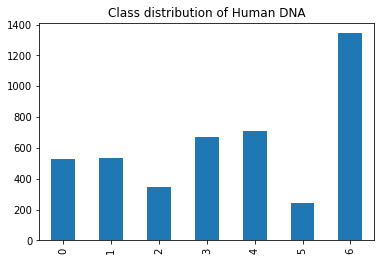

In [158]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")

### Load Chimpanzee DNA data

In [159]:
chimp_dna = pd.read_table('chimpanzee.txt.zip')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

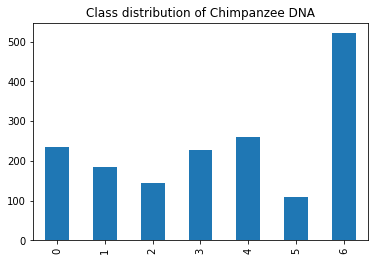

In [160]:
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")

### Load Dog DNA data

In [161]:
dog_dna = pd.read_table('dog.txt.zip')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Text(0.5, 1.0, 'Class distribution of Dog DNA')

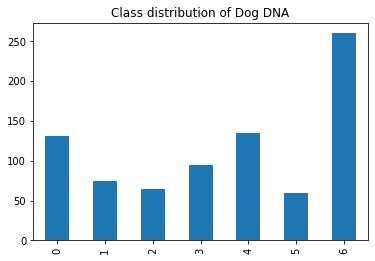

In [162]:
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

### convert a sequence of characters into k-mer words
- default size = 6 (hexamers)
- Kmers_funct() : 
    - 입력 : any sequence string
    - 출력 : all possible overlapping k-mers of a specified length

In [163]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [164]:
Kmers_funct("abcdefghijklmn", 6)

['abcdef',
 'bcdefg',
 'cdefgh',
 'defghi',
 'efghij',
 'fghijk',
 'ghijkl',
 'hijklm',
 'ijklmn']

In [165]:
# convert our training data sequences into short overlapping k-mers of length 6. 
# Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

In [166]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


### convert the lists of k-mers for each gene into string sentences of words
- can be used to create the Bag of Words model
- target variable y : class labels

In [167]:
human_texts = list(human_dna['words'])

for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

In [168]:
list(human_dna['words'])[0]

['atgccc',
 'tgcccc',
 'gcccca',
 'ccccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaat',
 'taaata',
 'aaatac',
 'aatact',
 'atacta',
 'tactac',
 'actacc',
 'ctaccg',
 'taccgt',
 'accgta',
 'ccgtat',
 'cgtatg',
 'gtatgg',
 'tatggc',
 'atggcc',
 'tggccc',
 'ggccca',
 'gcccac',
 'cccacc',
 'ccacca',
 'caccat',
 'accata',
 'ccataa',
 'cataat',
 'ataatt',
 'taatta',
 'aattac',
 'attacc',
 'ttaccc',
 'tacccc',
 'accccc',
 'ccccca',
 'ccccat',
 'cccata',
 'ccatac',
 'catact',
 'atactc',
 'tactcc',
 'actcct',
 'ctcctt',
 'tcctta',
 'ccttac',
 'cttaca',
 'ttacac',
 'tacact',
 'acacta',
 'cactat',
 'actatt',
 'ctattc',
 'tattcc',
 'attcct',
 'ttcctc',
 'tcctca',
 'cctcat',
 'ctcatc',
 'tcatca',
 'catcac',
 'atcacc',
 'tcaccc',
 'caccca',
 'acccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaaa',
 'taaaaa',
 'aaaaat',
 'aaaata',
 'aaatat',
 'aatatt',
 'atatta',
 'tattaa',
 'attaaa',
 'ttaaac',
 'taaaca',
 'aaacac',
 'aacaca',
 'acacaa',
 'cacaaa',
 'acaaac',

In [169]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

In [170]:
y_human

array([4, 4, 3, ..., 6, 6, 6])

### Convert k-mer words into uniform length numerical vectors 
- 입력 : k-mer words
- 출력 : uniform length numerical vectors
    - 내용 : counts for every k-mer in the vocabulary



In [171]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) # The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [172]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


### Train / Test 데이터 분리

In [173]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)

### 다항(multinomial) naive Bayes 분류기 생성
- 사전에 parameter tuning
    - ngram size = 4(예를 들어, Countvectorizer() 함수를 통해)
    - 모델 alpha = 0.1 값이 최선임을 발견
    - parameter 조율과 관련된 자세한 내용은 생략

- The smoothing priors \alpha >= 0 accounts for features not present in the learning samples and prevents zero probabilities in further computations. 
-The parameters \theta is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

- 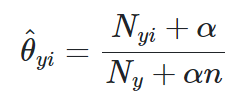

In [174]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)  # smoothing parameter (see the manual)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

### test 데이터 셋에 대해 예측 수행

In [175]:
y_pred = classifier.predict(X_test)

### 성능 평가
- 모델 성능 지표
    - 혼돈 메트릭스(confusion matrix)
    - 정확도(accuracy)
    - 정밀도(precision)
    - 리콜(recall)
    - F1 점수(f1 score)

#### Human DNA Sequence

In [176]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [177]:
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263


In [178]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

In [179]:
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


### 실제 test 데이터에 대한 성능 평가
- 다른 종들의 DNA 시퀀스들에 대해 얼마나 좋은 성능을 낼 수 있는 지 시험
    - Chimpanzee 데이터 : human과 가장 유사할 것으로 기대
    - Dog 데이터 : human의 가장 좋은 친구 

#### Chimpanzee DNA Sequence

In [180]:
# Predicting the chimp, dog sequences
y_pred_chimp = classifier.predict(X_chimp)

In [181]:
# performance on chimpanzee genes
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


#### Dog DNA Sequence

In [182]:
y_pred_dog = classifier.predict(X_dog)

In [183]:
# performance on dog genes
print("Confusion matrix for predictions on Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


# Altogether
- this time 9-mer instead of 6-mer and 4-gram

In [192]:
human_dna = pd.read_table('human.txt.zip')
chimp_dna = pd.read_table('chimpanzee.txt.zip')
dog_dna = pd.read_table('dog.txt.zip')

In [193]:
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence'], 9), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence'], 9), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence'], 9), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

In [202]:
cv = CountVectorizer() # The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)

classifier = MultinomialNB(alpha=0.1)  # smoothing parameter (see the manual)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [204]:
y_pred = classifier.predict(X_test)
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
get_metrics(y_test, y_pred)

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263


(0.9840182648401826, 0.984290543482443, 0.9840182648401826, 0.9840270014702487)

- (almost) the same as before